In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


In [45]:
df=pd.read_csv('Hitters.csv')
df.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [46]:
x=df[['CRuns']]
from sklearn.preprocessing import StandardScaler


In [47]:
scaler=StandardScaler()
x_s=scaler.fit_transform(x)
x_s

array([[-0.98563596],
       [-0.11329898],
       [-0.40407797],
       [ 1.40654586],
       [-0.93167697],
       [ 0.4262909 ],
       [-0.98563596],
       [-0.95266102],
       [-0.97964051],
       [ 1.27464611],
       [ 1.02883294],
       [-0.50000506],
       [-0.46103468],
       [-0.14927164],
       [ 0.05157571],
       [-1.01561317],
       [ 2.05705144],
       [-0.8807157 ],
       [ 0.85196737],
       [-0.87472026],
       [-0.85973165],
       [-0.91069292],
       [-1.04858811],
       [-0.35011898],
       [ 1.94613574],
       [ 0.24942533],
       [-0.20323063],
       [-0.3381281 ],
       [-0.02936278],
       [ 1.21169396],
       [ 2.02107878],
       [-0.83574988],
       [ 0.55819065],
       [-0.41906658],
       [-0.69785469],
       [ 1.49947523],
       [-0.60792304],
       [-0.97364507],
       [ 1.27464611],
       [-0.97364507],
       [-1.01561317],
       [ 1.31061877],
       [ 0.0365871 ],
       [-0.81776355],
       [ 0.38132508],
       [-0

In [48]:
wcss=[]
for k in range(1,15):
    km=KMeans(n_clusters=k,random_state=32)
    km.fit(x)
    wcss.append(km.inertia_)


c:\Users\prath\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prath\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\prath\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prath\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

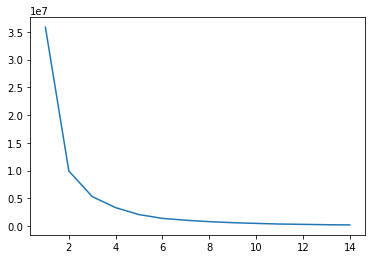

In [49]:
plt.plot(range(1,15),wcss);


Text(0.5, 1.0, 'hirarchical')

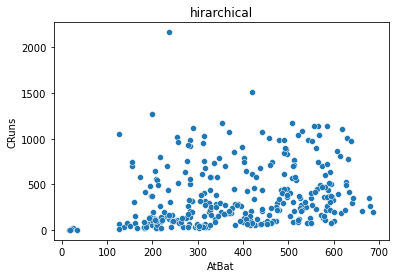

In [50]:
sns.scatterplot(x='AtBat',y='CRuns',data=df)
plt.xlabel('AtBat')
plt.ylabel('CRuns')
plt.title('hirarchical')

In [51]:
cluster=AgglomerativeClustering(n_clusters=3)
df['cluster']=cluster.fit_predict(x_s)
df['cluster']

0      1
1      0
2      1
3      2
4      1
      ..
317    0
318    2
319    1
320    0
321    0
Name: cluster, Length: 322, dtype: int64

Text(0.5, 1.0, 'hirarchical')

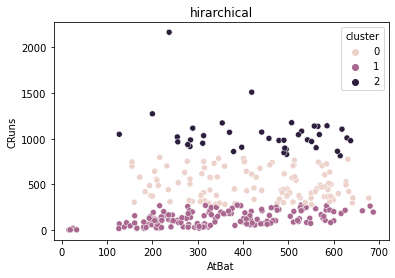

In [52]:
sns.scatterplot(x='AtBat',y='CRuns',hue='cluster',data=df)
plt.xlabel('AtBat')
plt.ylabel('CRuns')
plt.title('hirarchical')

In [53]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

Text(0.5, 1.0, 'hirarchical')

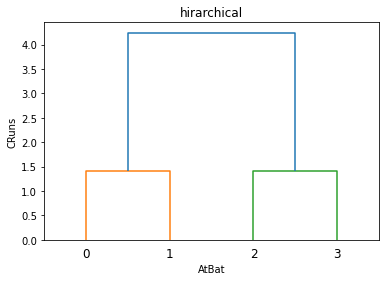

In [54]:
data=np.array([[1,2],[2,3],[5,6],[6,7]])
link=linkage(data)
dendrogram(link)
plt.xlabel('AtBat')
plt.ylabel('CRuns')
plt.title('hirarchical')